In [5]:
import librosa
import librosa.display
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

import os
from PIL import Image
import pathlib
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
from sklearn import preprocessing

from pydub import AudioSegment
from os import path
from pydub import AudioSegment

import os, sys, subprocess, shlex, re
import ffprobe

import matplotlib.cm as cm
import matplotlib
from matplotlib.pyplot import figure

import IPython.display as ipd
from os import path
from pydub import AudioSegment
import splitfolders

In [64]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [12]:
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from tensorflow.python.keras.layers import Input,Dense,Reshape,Conv2DTranspose,concatenate,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model

In [8]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [9]:
import os
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/Users/franciszekruszkowski/Desktop/AAAFYP': ['fypa2.0.ipynb', '.ipynb_checkpoints']


In [13]:
os.chdir('/Users/franciszekruszkowski/Downloads')

In [14]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [15]:
### Example Audio Signal 30 second disco music clip

audio_data10 = 'disco.00010.wav'
x10 , sr = librosa.load(audio_data10, sr=22050)

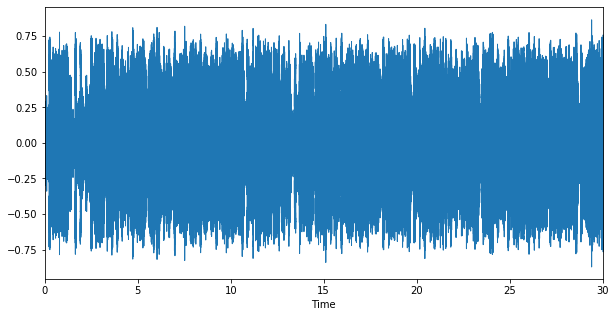

In [16]:
plt.figure(figsize=(10, 5))
librosa.display.waveplot(x10)

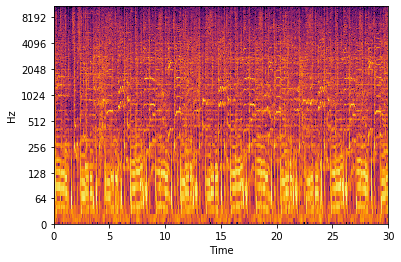

In [369]:
#STFT Spectogram

def stft_spec(y,ax):    
    X = librosa.stft(y)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log',ax=ax,cmap=cmap)
    
stft_spec(x10,ax=None)

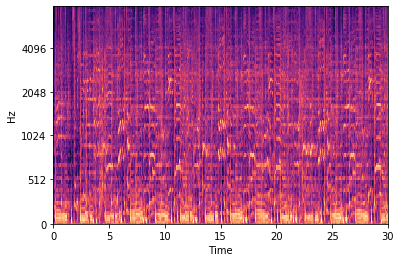

In [24]:
# MEL Spectogram

def mel_spec(y,ax):
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000,ax=ax)

mel_spec(x10,ax=None)

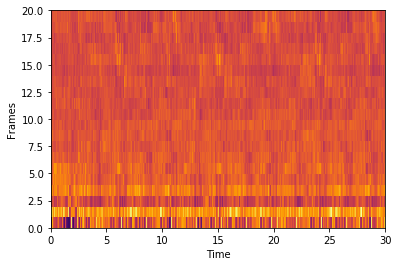

In [26]:
## MFCC with log 

cmap = plt.get_cmap('inferno')

def mfcc(y,ax):
    
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), sr=sr, n_mfcc=20)
    img = librosa.display.specshow(mfccs, x_axis='time',y_axis='frames',ax=ax,cmap=cmap)

mfcc(x10,ax=None)

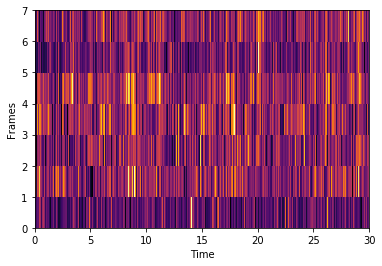

In [240]:
### Spectral Contrast 

def spectral_contrast(y,ax):
    
    contrast = librosa.feature.spectral_contrast(y, sr=sr)
    librosa.display.specshow(normalize(contrast,axis=1),x_axis='time',y_axis='frames',ax=ax,cmap=cmap)
    
spectral_contrast(x10,ax=None)

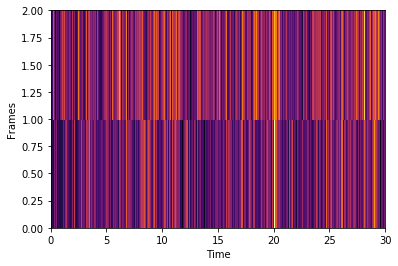

In [239]:
# Low Frequencies extraction - get only the first 2 subbands from spectral contrast

def lows(y,ax):
    
    contrast = librosa.feature.spectral_contrast(y, sr=sr)
    spectral_contrast_bass=contrast[5:,:]
    librosa.display.specshow(normalize(spectral_contrast_bass,axis=1),x_axis='time',y_axis='frames',ax=ax,cmap=cmap)

lows(x10,ax=None)

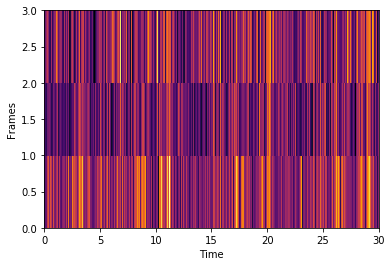

In [238]:
# Low Frequencies extraction - get only the first 3 subbands from spectral contrast 

def bass(y,ax):
    
    spectral_contrast = librosa.feature.spectral_contrast(y, sr=sr,hop_length=512)
    spectral_contrast_bass=spectral_contrast[4:,:] # get only the first 3 subbands - low frequencies
    librosa.display.specshow(normalize(spectral_contrast_bass,axis=1),x_axis='time',y_axis='frames',ax=ax,cmap=cmap)
    
bass(x10,ax=None)

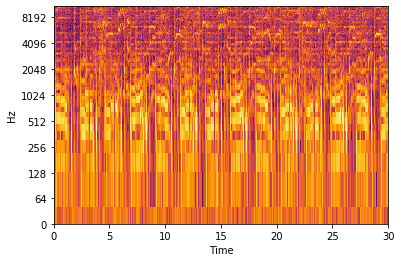

In [368]:
# Low Frequency extraction through the stft spectogram 

def bass_stft(y,ax):
    
    X = librosa.stft(y)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb[2:128,:], sr=sr, x_axis='time', y_axis='log',ax=ax,cmap=cmap)
    
bass_stft(x10,ax=None)

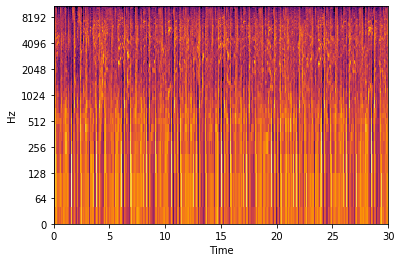

In [367]:
# Percussive features extraction  

def perc(y,ax):
    
    data_h, data_p = librosa.effects.hpss(y)
    spec_p = librosa.feature.melspectrogram(data_p, sr=sr)
    db_spec_p = librosa.power_to_db(spec_p,ref=np.max)
    librosa.display.specshow(db_spec_p, sr=sr,ax=ax,x_axis='time', y_axis='log',cmap=cmap)
    
perc(x10,ax=None)

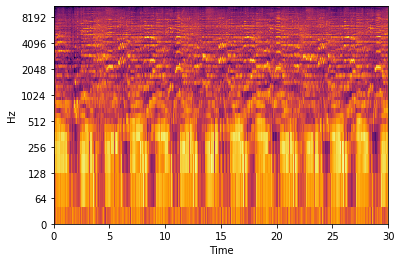

In [366]:
# Harmonic features extraction

def harm(y,ax):
    
    data_h, data_p = librosa.effects.hpss(y)
    spec_h = librosa.feature.melspectrogram(data_h, sr=sr)
    db_spec_h = librosa.power_to_db(spec_h,ref=np.max)
    librosa.display.specshow(db_spec_h, sr=sr,ax=ax,x_axis='time', y_axis='log',cmap=cmap)

harm(x10,ax=None)

In [125]:
plt.figure(figsize=(8, 8))
for filename in os.listdir('/Users/franciszekruszkowski/Downloads/CALOSC'):
               
    songname = f'/Users/franciszekruszkowski/Downloads/CALOSC/{filename}'
    if songname == '/Users/franciszekruszkowski/Downloads/CALOSC/.DS_Store':
        continue
    y, sr = librosa.load(songname, mono=True, duration=5)
        
    
    # STFT Spec
    stft_spec(y,ax=None)
    plt.axis('off');
    plt.savefig(f'/Users/franciszekruszkowski/Downloads/full_stft/{filename[:-3].replace(".", "")}.png',bbox_inches='tight', pad_inches=0)
    plt.clf()
     
    
    # Mel Spec
    mel_spec(y,ax=None)
    plt.axis('off');
    plt.savefig(f'/Users/franciszekruszkowski/Downloads/full_mel/{filename[:-3].replace(".", "")}.png',bbox_inches='tight', pad_inches=0)
    plt.clf()
            
    # MFCC
    mfcc(y,ax=None)
    plt.axis('off');
    plt.savefig(f'/Users/franciszekruszkowski/Downloads/full_mfcc/{filename[:-3].replace(".", "")}.png',bbox_inches='tight', pad_inches=0)
    plt.clf()
       
    # Spectral Contrast
    spectral_contrast(y,ax=None)
    plt.axis('off');
    plt.savefig(f'/Users/franciszekruszkowski/Downloads/full_sc/{filename[:-3].replace(".", "")}.png',bbox_inches='tight', pad_inches=0)
    plt.clf()
      
    # Lows
    lows(y,ax=None)
    plt.axis('off');
    plt.savefig(f'/Users/franciszekruszkowski/Downloads/full_lows/{filename[:-3].replace(".", "")}.png',bbox_inches='tight', pad_inches=0)
    plt.clf()
        
    # Bass 
    bass(y,ax=None)
    plt.axis('off');
    plt.savefig(f'/Users/franciszekruszkowski/Downloads/full_bass/{filename[:-3].replace(".", "")}.png',bbox_inches='tight', pad_inches=0)
    plt.clf()
            
    # Bass STFT
    bass_stft(y,ax=None)
    plt.axis('off');
    plt.savefig(f'/Users/franciszekruszkowski/Downloads/full_bass_stft/{filename[:-3].replace(".", "")}.png',bbox_inches='tight', pad_inches=0)
    plt.clf()
    
    # Harm
    harm(y,ax=None)
    plt.axis('off');
    plt.savefig(f'/Users/franciszekruszkowski/Downloads/full_harm/{filename[:-3].replace(".", "")}.png',bbox_inches='tight', pad_inches=0)
    plt.clf()
            
    # Perc
    perc(y,ax=None)
    plt.axis('off');
    plt.savefig(f'/Users/franciszekruszkowski/Downloads/full_perc/{filename[:-3].replace(".", "")}.png',bbox_inches='tight', pad_inches=0)
    plt.clf()

<Figure size 576x576 with 0 Axes>

### Example of how spectral_contrast visualisation differs between music genres.
### This is an example image input that will be used for classification/clustering
### Research papers imply Spectral Contrast to be the most accurate in music genre classification, hence chosen for the example 

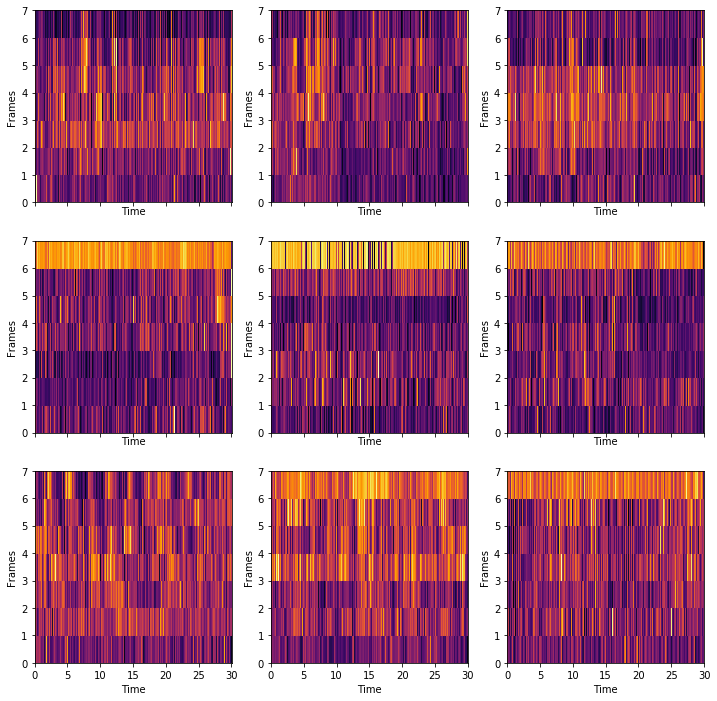

In [261]:
audio1 = 'pop.00010.wav'
y1 , sr = librosa.load(audio1, sr=22050)
audio2 = 'pop.00040.wav'
y2 , sr = librosa.load(audio2, sr=22050)
audio3 = 'pop.00060.wav'
y3 , sr = librosa.load(audio3, sr=22050)

audio4 = 'metal.00020.wav'
y4 , sr = librosa.load(audio4, sr=22050)
audio5 = 'metal.00050.wav'
y5 , sr = librosa.load(audio5, sr=22050)
audio6 = 'metal.00070.wav'
y6 , sr = librosa.load(audio6, sr=22050)

audio7 = 'country.00030.wav'
y7 , sr = librosa.load(audio7, sr=22050)
audio8 = 'country.00060.wav'
y8 , sr = librosa.load(audio8, sr=22050)
audio9 = 'country.00080.wav'
y9 , sr = librosa.load(audio9, sr=22050)

fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True,figsize=(12,12))
spectral_contrast(y1,ax=ax[0, 0])
spectral_contrast(y2,ax=ax[0, 1])
spectral_contrast(y3,ax=ax[0, 2])
spectral_contrast(y4,ax=ax[1, 0])
spectral_contrast(y5,ax=ax[1, 1])
spectral_contrast(y6,ax=ax[1, 2])
spectral_contrast(y7,ax=ax[2, 0])
spectral_contrast(y8,ax=ax[2, 1])
spectral_contrast(y9,ax=ax[2, 2])

### The Dataset we will be using for the testing is a dataset consisting of 100 metal songs, 100 pop songs and 100 country songs 

In [ ]:
### Splitting the data into a train and validation set

splitfolders.ratio('./data-sc/', output="./data-sc", seed=12345, ratio=(.8, .2))
splitfolders.ratio('./data-mfcc/', output="./data-mfcc", seed=12345, ratio=(.8, .2))
splitfolders.ratio('./data-mel/', output="./data-mel", seed=12345, ratio=(.8, .2))
splitfolders.ratio('./data-stft_spec/', output="./data-stft_spec", seed=12345, ratio=(.8, .2))
splitfolders.ratio('./data-bass_stft/', output="./data-bass_stft", seed=12345, ratio=(.8, .2))
splitfolders.ratio('./data-low/', output="./data-low", seed=12345, ratio=(.8, .2))
splitfolders.ratio('./data-bass/', output="./data-bass", seed=12345, ratio=(.8, .2))
splitfolders.ratio('./data-harm/', output="./data-harm", seed=12345, ratio=(.8, .2))
splitfolders.ratio('./data-perc/', output="./data-perc", seed=12345, ratio=(.8, .2))

In [2582]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255, 
        horizontal_flip=False)

test_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=False)

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [95]:
def datasets(path):
    
    train_set = train_datagen.flow_from_directory(
            f'./{path}/train',
            target_size=(128, 128),
            batch_size=32,
            color_mode="rgb",
            class_mode='input',
            shuffle = False)

    val_set = test_datagen.flow_from_directory(
            f'./{path}/val',
            target_size=(128, 128),
            batch_size=32,
            color_mode="rgb",
            class_mode='input',
            shuffle = False)

    test_set = train_datagen.flow_from_directory(
            f'./{path}/train',
            target_size=(128, 128),
            batch_size=1,
            color_mode="rgb",
            class_mode='categorical',
            shuffle = False)

    return train_set,val_set,test_set

### MODELS 

Model 1 : U-Net Autoencoder 

In [113]:
start_neurons=4

input_layer = keras.Input(shape=(128, 128, 3))

conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(input_layer)
conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv1)
pool1 = MaxPooling2D((2, 2))(conv1)
pool1 = Dropout(0.25)(pool1)

conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(pool1)
conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(conv2)
pool2 = MaxPooling2D((2, 2))(conv2)
pool2 = Dropout(0.5)(pool2)

conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(pool2)
conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(conv3)
pool3 = MaxPooling2D((2, 2))(conv3)
pool3 = Dropout(0.5)(pool3)

conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(pool3)
conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(conv4)
pool4 = MaxPooling2D((2, 2))(conv4)
pool4 = Dropout(0.5)(pool4)
    
# Middle
convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(pool4)
convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(convm)

l = Flatten()(convm)
l = Dense(64,activation="sigmoid")(l)
d = Reshape((8,8,1))(l)

deconv4 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(d)
uconv4 = concatenate([deconv4, conv4])
uconv4 = Dropout(0.5)(uconv4)
uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)
uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)

deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv4)
uconv3 = concatenate([deconv3, conv3])
uconv3 = Dropout(0.5)(uconv3)
uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)
uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)

deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv3)
uconv2 = concatenate([deconv2, conv2])
uconv2 = Dropout(0.5)(uconv2)
uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)
uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)

deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
uconv1 = concatenate([deconv1, conv1])
uconv1 = Dropout(0.5)(uconv1)
uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
  
output_layer = Conv2D(3, (1,1), padding="same", activation="sigmoid")(uconv1)

from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01)

autoencoder_unet = keras.Model(input_layer, output_layer)
autoencoder_unet.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])
encoder_unet = keras.Model(input_layer, l)
#autoencoder_unet.summary()

Model 2 : Autoencoder 

In [121]:
input_img = keras.Input(shape=(128, 128, 3))
num_neurons=16

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)

encoded = layers.MaxPooling2D((2,2), padding='same')(x)
encoded = layers.Flatten()(encoded)
encoded = Dropout(0.25)(encoded)
encoded = Dense(256,activation='relu')(encoded)
encoded = Dropout(0.25)(encoded)

encoded = Dense(num_neurons,activation='sigmoid')(encoded)

dec = Dense(256,activation='relu')(encoded)
dec = Reshape((16,16,1))(dec)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(dec)
x = layers.UpSampling2D((2, 2))(x)
x = BatchNormalization()(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = BatchNormalization()(x)
x = layers.Conv2D(32, (3, 3), activation='relu',padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = BatchNormalization()(x)

decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

from tensorflow.keras.optimizers import SGD

opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer=opt,loss='binary_crossentropy')
autoencoder.summary()

# ENCODER

encoder = keras.Model(input_img, encoded)

cbs = [keras.callbacks.EarlyStopping(patience=15, monitor='val_loss')]

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 64, 64, 16)        4624      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 32, 32, 8)         1160      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 8)         0   

In [106]:
def fit(autoencoder,encoder,train,val,epochs,name):
    
    # save name in .h5 format 
    autoencoder.fit_generator(train,epochs=epochs,validation_data=val,callbacks=cbs,verbose=0)

    encoder.save(name) 

In [47]:
def sketch(pred,km):
    pca = PCA(n_components = 2)
    prin_comp = pca.fit_transform(pred)
    plt.scatter(prin_comp[:,0],prin_comp[:,1],c=km.labels_)

In [48]:
def preds_accuracy(name,train_test_set,clusters):
    
    encoder = load_model(name,compile=False)
    preds = encoder.predict_generator(train_test_set)
    true = train_test_set.classes
    k_encoded = KMeans(n_clusters=clusters, random_state=1)
    k_encoded.fit(preds)
    sketch(preds,k_encoded)
    cm = confusion_matrix(true, k_encoded.labels_)
    cm_argmax = cm.argmax(axis=0)
    k_encoded.labels_ = np.array([cm_argmax[i] for i in k_encoded.labels_])
    score=accuracy_score(true,k_encoded.labels_)
    
    print(f"Accuracy score : {score}") 

In [225]:
### Splitting the data into a train and validation set

splitfolders.ratio('./data-sc/', output="./data-sc", seed=12345, ratio=(.8, .2))
splitfolders.ratio('./data-mfcc/', output="./data-mfcc", seed=12345, ratio=(.8, .2))
splitfolders.ratio('./data-mel/', output="./data-mel", seed=12345, ratio=(.8, .2))
splitfolders.ratio('./data-stft_spec/', output="./data-stft_spec", seed=12345, ratio=(.8, .2))
splitfolders.ratio('./data-bass_stft/', output="./data-bass_stft", seed=12345, ratio=(.8, .2))
splitfolders.ratio('./data-low/', output="./data-low", seed=12345, ratio=(.8, .2))
splitfolders.ratio('./data-bass/', output="./data-bass", seed=12345, ratio=(.8, .2))
splitfolders.ratio('./data-harm/', output="./data-harm", seed=12345, ratio=(.8, .2))
splitfolders.ratio('./data-perc/', output="./data-perc", seed=12345, ratio=(.8, .2))

Copying files: 300 files [00:00, 957.10 files/s]


### testing spectral_contrast(y,ax), mfcc(y,ax), mels_pec(y,ax), stft_spec(y,ax) for the most optimal function for general music similarity classification/clustering 


In [ ]:
train_sc,val_sc,test_sc = datasets('data-sc')
train_mfcc,val_mfcc, test_mfcc = datasets('data-mfcc')
train_mel,val_mel, test_mel = datasets('data-mel')
train_stft_spec,val_stft_spec, test_stft_spec = datasets('data-stft_spec')

In [ ]:
fit(autoencoder,encoder,train_sc,val_sc,400,"data-sc.h5")
fit(autoencoder,encoder,train_mfcc,val_mfcc,400,"data-mfcc.h5")
fit(autoencoder,encoder,train_mel,val_mel,400,"data-mel.h5")
fit(autoencoder,encoder,train_stft_spec,val_stft_spec,400,"data-stft_spec.h5")

Accuracy score : 0.7875


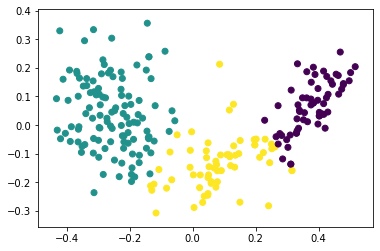

In [255]:
preds_accuracy('data-sc.h5',test_sc,3)

Accuracy score : 0.425


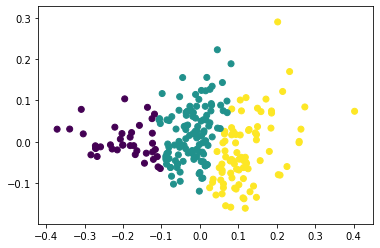

In [218]:
preds_accuracy('data-mfcc.h5',test_mfcc,3)

Accuracy score : 0.4166666666666667


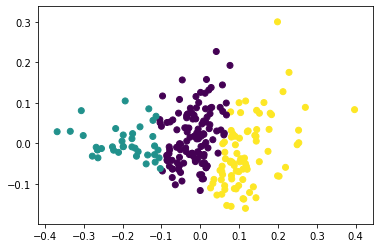

In [219]:
preds_accuracy('data-mel.h5',test_mel,3)

Accuracy score : 0.5958333333333333


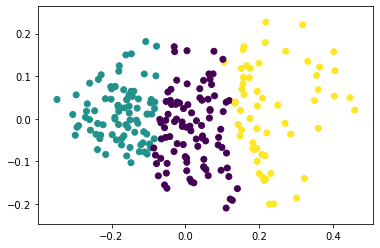

In [220]:
preds_accuracy('data-stft_spec.h5',test_stft_spec,3)

### spectral_contrast(y,ax) has the highest accuracy, we will continue with the Spectral Contrast feature extraction for general music classification/clustering

Accuracy score : 0.6708333333333333


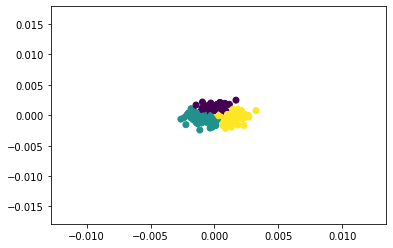

In [116]:
# Now that we see Spectral_Contrast being most effective, we compare the U-Net Model (Model 1)

fit(autoencoder_net,encoder_unet,train_sc,val_sc,400,"dataset-sc-unet.h5")
preds_accuracy('dataset-sc-unet.h5',test_sc,3) 

# Not more effective than the "autoencoder" model (Model 2)

### testing for the optimal function for bass feature extraction 

In [ ]:
### Optimal functon for bass features extraction test

train8bass,val8bass,test8bass = datasets('8bass')           
train8low,val8low,test8low = datasets('8low') 
train8stft_bass,val8stft_bass,test8stft_bass = datasets('8bass_stft')

fit(autoencoder,encoder,train8bass,val8bass,400,"8bass.h5")
fit(autoencoder,encoder,train8low,val8low,400,"8low.h5")
fit(autoencoder,encoder,train8stft_bass,val8stft_bass,400,"8bass_stft.h5")

Instructions for updating:
Please use Model.predict, which supports generators.
Accuracy score : 0.7125


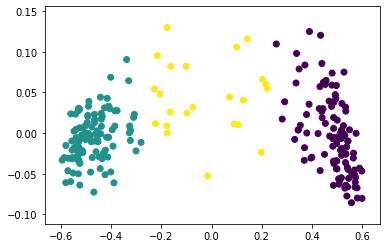

In [49]:
preds_accuracy('8bass.h5',test8bass,3)

Accuracy score : 0.7166666666666667


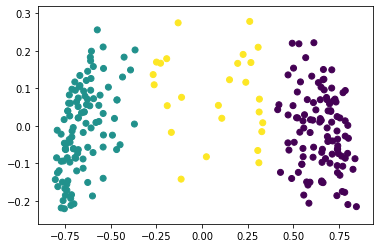

In [50]:
preds_accuracy('8low.h5',test8low,3) ### Best result

Accuracy score : 0.5916666666666667


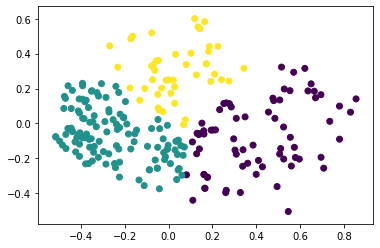

In [51]:
preds_accuracy('8bass_stft.h5',test8stft_bass,3)

### Harmonics and Percussive musicla feature extraction functions 

In [ ]:
train_harm,val_harm, test_harm = datasets('data-harm')
train_perc,val_perc, test_perc = datasets('data-perc') 

fit(autoencoder,encoder,train_nharm,val_nharm,400,"nharm.h5")
fit(autoencoder,encoder,train_nperc,val_nperc,400,"nperc.h5")

Accuracy score : 0.5958333333333333


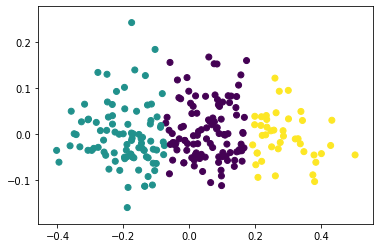

In [254]:
preds_accuracy('nperc.h5',test_nperc,3)

Accuracy score : 0.6208333333333333


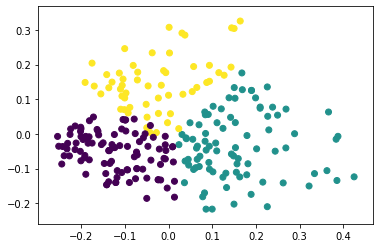

In [253]:
preds_accuracy('nharm.h5',test_nharm,3)

### MY MUSIC 

In [19]:
%cd "/Users/franciszekruszkowski/Downloads"


/Users/franciszekruszkowski/Downloads


In [68]:
# Dark Hard Techno 

audio_data1 = 'Tommy Mork - Eternally Cruel.wav'
x1 , sr = librosa.load(audio_data1, sr=22050)
audio_data2 = 'Dostroic-Skyler (Absntmnded, TM-Remix).wav'
x2 , sr = librosa.load(audio_data2, sr=22050)

# Hard techno a bit more groovy

audio_data3 = "01 WHITE I - Primordialis.wav"
x3 , sr = librosa.load(audio_data3, sr=22050)
audio_data4 = "Boney M - Rasputin (Y-NØT REMIX) (1).wav"
x4 , sr = librosa.load(audio_data4, sr=22050)

# Hard techno groovy and more trancy  

audio_data5 = "boursy.wav"
x5 , sr = librosa.load(audio_data5, sr=22050)
audio_data6 = "b-codebreaker.wav"
x6 , sr = librosa.load(audio_data6, sr=22050)

# Hard Trance 

audio_data7 = "Dallaniel - Berlin On Sunday 320kbps.wav"
x7 , sr = librosa.load(audio_data7, sr=22050)
audio_data8 = "SINDEX PREMIERE_ Katia Val - Move Slow [FRWVA001]wav_convert"
x8 , sr = librosa.load(audio_data8, sr=22050)
audio_data9 = "Funk Tribu - Phonky Tribu wav_convert"
x9 , sr = librosa.load(audio_data9, sr=22050)

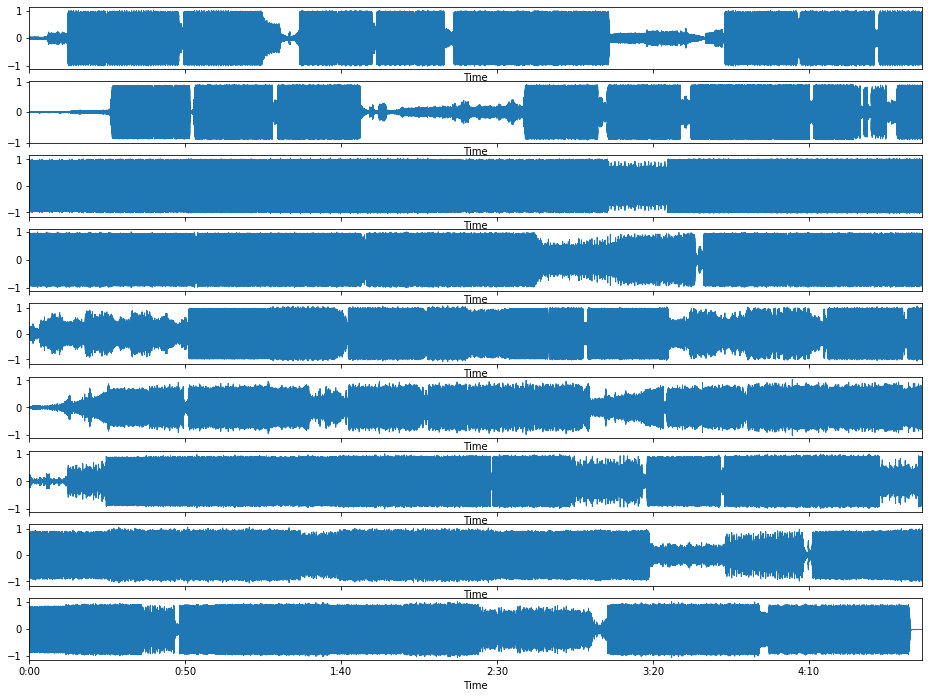

In [69]:
fig, ax = plt.subplots(nrows=9, ncols=1, sharex=True,figsize=(16,12))

librosa.display.waveplot(x1, ax=ax[0])
librosa.display.waveplot(x2, ax=ax[1])
librosa.display.waveplot(x3, ax=ax[2])
librosa.display.waveplot(x4, ax=ax[3])
librosa.display.waveplot(x5, ax=ax[4])
librosa.display.waveplot(x6, ax=ax[5])
librosa.display.waveplot(x7, ax=ax[6])
librosa.display.waveplot(x8, ax=ax[7])
librosa.display.waveplot(x9, ax=ax[8])

### Energy onset detection, 16 beat phase extraction 

In [70]:
def onset(x):
    
    sr=22050
    onset_env = librosa.onset.onset_strength(x, sr=sr, aggregate=np.median)
    tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
    meter = 4
    measures = (len(beats) // meter)
    beat_strengths = onset_env[beats]
    measure_beat_strengths = beat_strengths[:measures * meter].reshape(-1, meter)
    beat_pos_strength = np.sum(measure_beat_strengths, axis=0)
    downbeat_pos = np.argmax(beat_pos_strength)
    full_measure_beats = beats[:measures * meter].reshape(-1, meter)
    downbeat_frames = full_measure_beats[:, downbeat_pos]
    downbeat_times = librosa.frames_to_time(downbeat_frames, sr=sr)
    
    return downbeat_frames,downbeat_times  

def get_fraze(dt):
    xy = dt[16]
    yx = dt[20]
    fraze=librosa.time_to_frames(np.array([xy,yx]), sr=22050,hop_length=1)
    return fraze

def transfo(x):
    df,dt=onset(x)
    fraze=get_fraze(dt)
    x=x[fraze[0]:fraze[1]]
    return x

In [71]:
x1=transfo(x1)
x2=transfo(x2)
x3=transfo(x3)
x4=transfo(x4)
x5=transfo(x5)
x6=transfo(x6)
x7=transfo(x7)
x8=transfo(x8)
x9=transfo(x9)

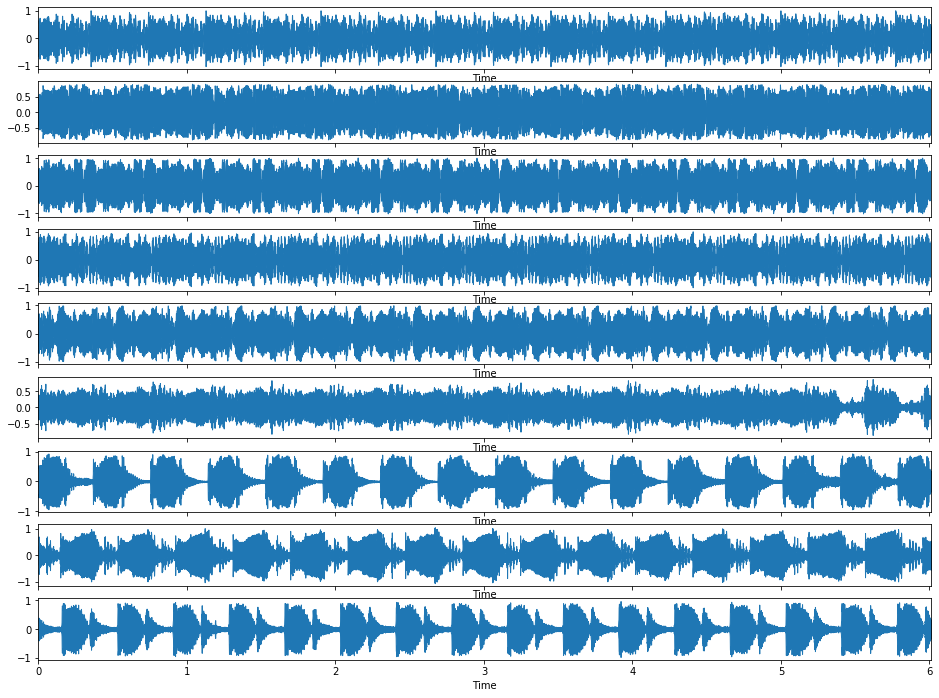

In [72]:
fig, ax = plt.subplots(nrows=9, ncols=1, sharex=True,figsize=(16,12))

librosa.display.waveplot(x1, ax=ax[0])
librosa.display.waveplot(x2, ax=ax[1])
librosa.display.waveplot(x3, ax=ax[2])
librosa.display.waveplot(x4, ax=ax[3])
librosa.display.waveplot(x5, ax=ax[4])
librosa.display.waveplot(x6, ax=ax[5])
librosa.display.waveplot(x7, ax=ax[6])
librosa.display.waveplot(x8, ax=ax[7])
librosa.display.waveplot(x9, ax=ax[8])

### The chosen functions with the highest accuracy from the testing on the labeled dataset were :

### spectral_contrast() --- for general music similarity clustering
### lows() --- for bassline similarity
### harm() --- for harmonics similarity
### perc() --- for percussions similarity

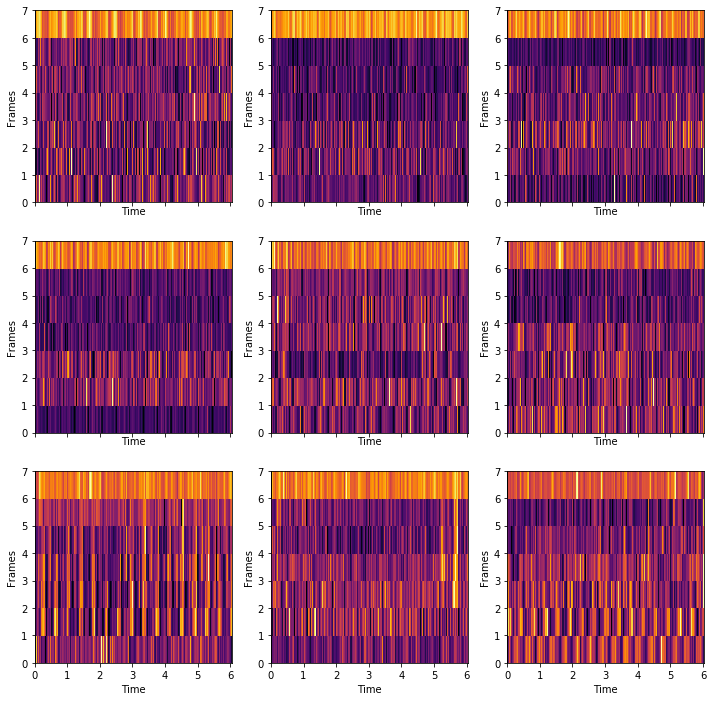

In [256]:
# Spectral Contrast for general song similarity clustering 

fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True,figsize=(12,12))
spectral_contrast(x1,ax=ax[0, 0])
spectral_contrast(x2,ax=ax[0, 1])
spectral_contrast(x3,ax=ax[0, 2])
spectral_contrast(x4,ax=ax[1, 0])
spectral_contrast(x5,ax=ax[1, 1])
spectral_contrast(x6,ax=ax[1, 2])
spectral_contrast(x7,ax=ax[2, 0])
spectral_contrast(x8,ax=ax[2, 1])
spectral_contrast(x9,ax=ax[2, 2])

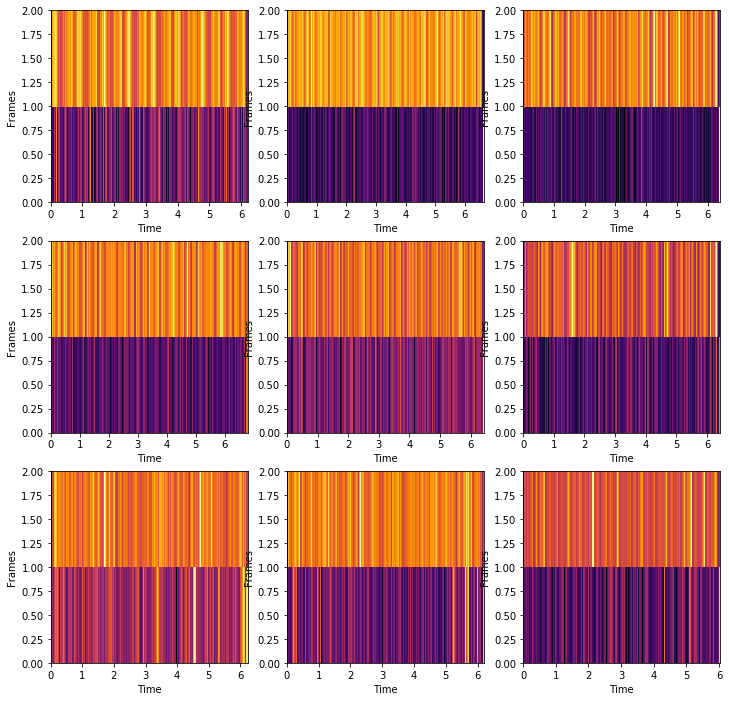

In [79]:
### Bass feature extraction from first 2 sub-bands of Spectral Constrast - lows() function

fig, ax = plt.subplots(nrows=3, ncols=3, sharex=False,figsize=(12,12))
lows(x1,ax=ax[0, 0])
lows(x2,ax=ax[0, 1])
lows(x3,ax=ax[0, 2])
lows(x4,ax=ax[1, 0])
lows(x5,ax=ax[1, 1])
lows(x6,ax=ax[1, 2])
lows(x7,ax=ax[2, 0])
lows(x8,ax=ax[2, 1])
lows(x9,ax=ax[2, 2])

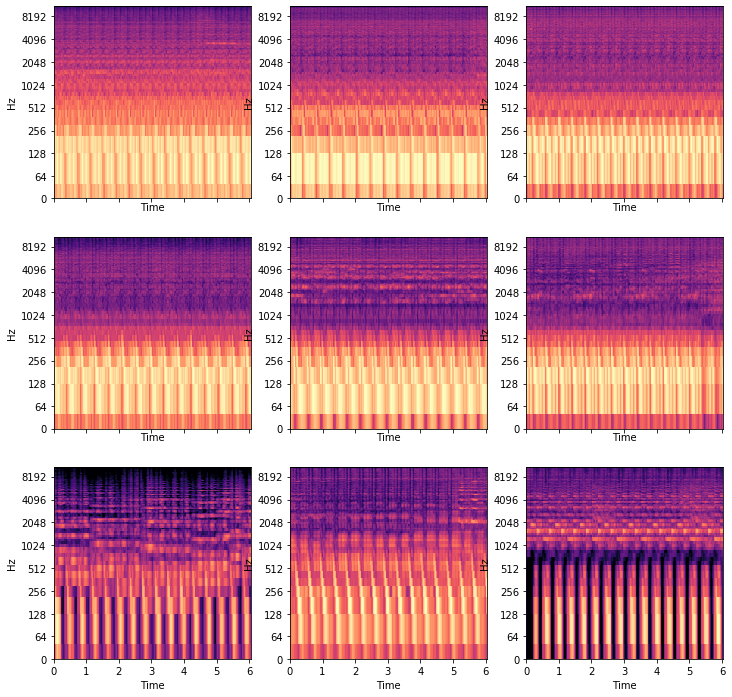

In [90]:
# Harmonics features extration

fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True,figsize=(12,12))
harm(x1,ax=ax[0, 0])
harm(x2,ax=ax[0, 1])
harm(x3,ax=ax[0, 2])
harm(x4,ax=ax[1, 0])
harm(x5,ax=ax[1, 1])
harm(x6,ax=ax[1, 2])
harm(x7,ax=ax[2, 0])
harm(x8,ax=ax[2, 1])
harm(x9,ax=ax[2, 2])

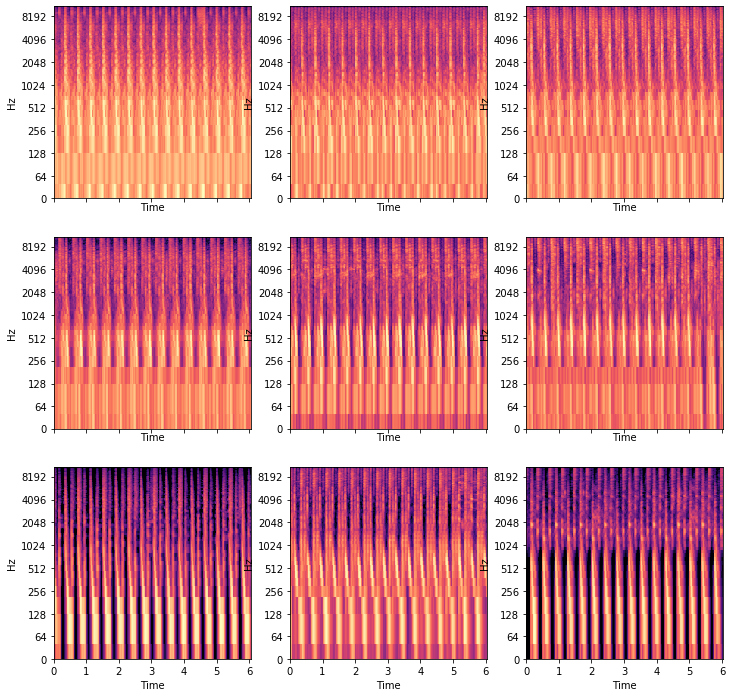

In [91]:
# Percussive features extration

fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True,figsize=(12,12))
perc(x1,ax=ax[0, 0])
perc(x2,ax=ax[0, 1])
perc(x3,ax=ax[0, 2])
perc(x4,ax=ax[1, 0])
perc(x5,ax=ax[1, 1])
perc(x6,ax=ax[1, 2])
perc(x7,ax=ax[2, 0])
perc(x8,ax=ax[2, 1])
perc(x9,ax=ax[2, 2])

In [ ]:
### Music transformation to wav format 

def wav_tfr1(source):
    
    sound = AudioSegment.from_mp3(source)
    source = source[:-11]
    wav="wav_convert"
    string=source+wav
    dst = string
    sound.export(dst, format="wav")
    
for song in os.listdir('/Users/franciszekruszkowski/Downloads/musicmp3'):
        
    track_id = f'/Users/franciszekruszkowski/Downloads/musicmp3/{song}'
    if track_id == '/Users/franciszekruszkowski/Downloads/musicmp3/.DS_Store':
        continue
        
    wav_tfr1(track_id)

In [126]:
plt.figure(figsize=(8, 8))
for filename in os.listdir('/Users/franciszekruszkowski/Downloads/musicmp3_wav'):
        
        
    songname = f'/Users/franciszekruszkowski/Downloads/musicmp3_wav/{filename}'
    if songname == '/Users/franciszekruszkowski/Downloads/musicmp3_wav/.DS_Store':
        continue
        
    y, sr = librosa.load(songname, mono=True)
        
    # 16 beat-long phrase extrapolaton 
    y=transfo(y)
    
    #Spectral Contrast
    
    spectral_contrast(y,ax=None)
    plt.axis('off');
    plt.savefig(f'/Users/franciszekruszkowski/Downloads/all_spectral_contrast/{filename[:-3].replace(".", "")}.png',bbox_inches='tight', pad_inches=0)
    plt.clf() 
        
    #BASS
        
    lows(y,ax=None)
    plt.axis('off');
    plt.savefig(f'/Users/franciszekruszkowski/Downloads/all_lows/{filename[:-3].replace(".", "")}.png',bbox_inches='tight', pad_inches=0)
    plt.clf()
        
    #PERC
        
    perc(y,ax=None)
    plt.axis('off');
    plt.savefig(f'/Users/franciszekruszkowski/Downloads/all_perc/{filename[:-3].replace(".", "")}.png',bbox_inches='tight', pad_inches=0)
    plt.clf()
        
    #HARM
        
    harm(y,ax=None)
    plt.axis('off');
    plt.savefig(f'/Users/franciszekruszkowski/Downloads/all_harm/{filename[:-3].replace(".", "")}.png',bbox_inches='tight', pad_inches=0)
    plt.clf()

<Figure size 576x576 with 0 Axes>

In [ ]:
### Train and Validation split

splitfolders.ratio('./all_lows/', output="./split_low", seed=12345, ratio=(.8, .2))
splitfolders.ratio('./all_perc/', output="./split_perc", seed=12345, ratio=(.8, .2))
splitfolders.ratio('./all_harm/', output="./split_harm", seed=12345, ratio=(.8, .2))
splitfolders.ratio('./all_spectral_contrast/', output="./split_spectral_contrast", seed=12345, ratio=(.8, .2))

### Test set - all data 

splitfolders.ratio('./all_lows/', output="./test_low", seed=12345, ratio=(1, 0))
splitfolders.ratio('./all_perc/', output="./test_perc", seed=12345, ratio=(1, 0))
splitfolders.ratio('./all_harm/', output="./test_harm", seed=12345, ratio=(1, 0))
splitfolders.ratio('./all_spectral_contrast/', output="./test_spectral_contrast", seed=12345, ratio=(1, 0))

In [127]:
def dataset_gen(path):
    
    train_set = train_datagen.flow_from_directory(
            f'./split_{path}/train',
            target_size=(128, 128),
            batch_size=32,
            color_mode="rgb",
            class_mode='input',
            shuffle = False)

    val_set = test_datagen.flow_from_directory(
            f'./split_{path}/val',
            target_size=(128, 128),
            batch_size=32,
            color_mode="rgb",
            class_mode='input',
            shuffle = False)
    
    test_set = train_datagen.flow_from_directory(
            f'./test_{path}/train',
            target_size=(128, 128),
            batch_size=1,
            color_mode="rgb",
            class_mode='input',
            shuffle = False)

    return  train_set,val_set,test_set

In [141]:
def preds_playlist(name,test_set,clusters):
    
    encoder = load_model(name,compile=False)
    preds = encoder.predict_generator(test_set)
    k_encoded = KMeans(n_clusters=clusters, random_state=1)
    k_encoded.fit(preds)
    sketch(preds,k_encoded)
    
    tracklist=[]
    labels = k_encoded.labels_
    files = test_set.filenames
    
    for tracks in files:
        tracklist.append(tracks[7:-12])
    
    return tracklist,labels,preds

In [ ]:
def k(pred):
    Sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(pred)
        Sum_of_squared_distances.append(km.inertia_)

    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

In [251]:
sc_train, sc_val, sc_test = dataset_gen('spectral_contrast')
l_train, l_val, l_test = dataset_gen('low')
h_train, h_val ,h_test = dataset_gen('harm')
p_train, p_val ,p_test = dataset_gen('perc')

Found 228 images belonging to 1 classes.
Found 57 images belonging to 1 classes.
Found 285 images belonging to 1 classes.
Found 228 images belonging to 1 classes.
Found 57 images belonging to 1 classes.
Found 285 images belonging to 1 classes.
Found 228 images belonging to 1 classes.
Found 57 images belonging to 1 classes.
Found 285 images belonging to 1 classes.
Found 228 images belonging to 1 classes.
Found 57 images belonging to 1 classes.
Found 285 images belonging to 1 classes.


In [252]:
fit(autoencoder,encoder,sc_train,sc_val,400,"m_sc.h5")
fit(autoencoder,encoder,l_train,l_val,400,"m_low.h5")
fit(autoencoder,encoder,h_train,h_train,400,"m_harm.h5")
fit(autoencoder,encoder,p_train,p_val,400,"m_perc.h5")

  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']


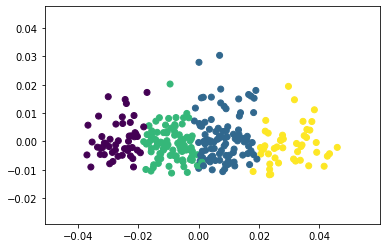

In [142]:
### General Song-Simarity Playlist Clustering 

sc_tracklist, sc_lables, sc_pred = preds_playlist('sc.h5',sc_test,4)

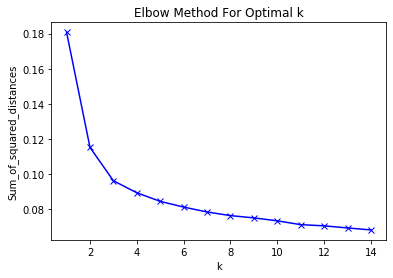

In [143]:
# We can observe that the most appropriate number of playlists for general clustering is 3 or 4 

k(sc_pred)

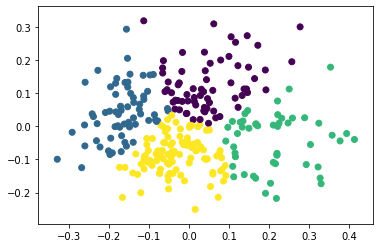

In [266]:
# Playlist based on Bassline similarity 

l_tracklist, l_lables, l_pred   = preds_playlist('m_low.h5',l_test,4)

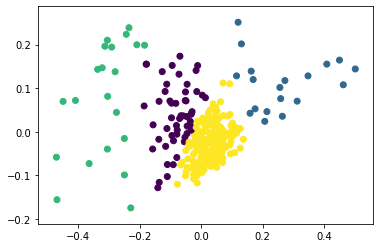

In [267]:
#Playlist based on Harmonnics similarity

h_tracklist, h_lables, h_pred    = preds_playlist('m_harm.h5',h_test,4)

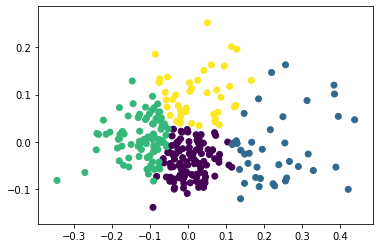

In [268]:
# Playlists on percussions similarity 

p_tracklist, p_lables, p_pred  = preds_playlist('m_perc.h5',p_test,4)

In [372]:
playlists_sc = pd.DataFrame({"Filename":sc_tracklist,"Playlist nr":sc_lables+1})
playlists_l  = pd.DataFrame({"Filename":l_tracklist, "Playlist nr":l_lables+1})
playlists_h  = pd.DataFrame({"Filename":h_tracklist, "Playlist nr":h_lables+1})
playlists_p  = pd.DataFrame({"Filename":p_tracklist, "Playlist nr":p_lables+1})

In [373]:
def view_playlists(playlist):
    
    playlist_list=[]
    
    for i in range(1,5):
        playlist_cat = playlist[playlist["Playlist nr"]==i]
        playlist_list.append(playlist_cat)
    return playlist_list

In [374]:
general=view_playlists(playlists_sc)
bassline=view_playlists(playlists_l)
harmonics=view_playlists(playlists_h)
percussions=view_playlists(playlists_p)

In [375]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

### Playlists based on general tracks similarity 

In [387]:
display_side_by_side(general[0].tail(10),general[1].tail(10),general[2].tail(10),general[3].tail(10), 
                     titles=['Playlist1','Playlist2','Playlist3','Playlist4'])

,Filename,Playlist nr
230,TRIS - Mauricius Von Craûn,1
233,Ten Years Later,1
234,Tilman Riddelt - Lixxiana [HRATRI_001],1
236,Treibstoff - Reign Of Shadows [VPFD41],1
252,X-Alox - Money To Silence You [BST004 | Premiere],1
274,[Premiere] HyperionORBIT - It Has Happened To Me (EEVOL3),1
278,✞ FREE DOWNLOAD SERIES ✞ - CEKTA - Eid Al Adha [EYDFDS010],1
280,𝐏𝐑𝐄𝐌𝐈𝐄𝐑𝐄| Elykua & Cer_VI - External Bleeding (Original Mix),1
281,𝐏𝐑𝐄𝐌𝐈𝐄𝐑𝐄| TØLR - Dead Land [WLR004],1
284,𝙐𝙕 𝙋𝙧𝙚𝙢𝙞𝙚𝙧𝙚_ Mab - Victory Of The Purest,1


### Playlists based on Bassline similarity 

In [388]:
display_side_by_side(bassline[0].tail(10),bassline[1].tail(10),bassline[2].tail(10),bassline[3].tail(10), 
                     titles=['Playlist1','Playlist2','Playlist3','Playlist4'])

,Filename,Playlist nr
244,VIVAY - Groom (Tommy Mork Remix) FREE DL,1
245,VON RIU - Smashed Up [FREE DL],1
249,WZX_O & Joele Basili - We Are Dreamers [CR009],1
253,XTECH - Stop The Music,1
258,[FREE DL] Around The World (La la la la la)(MZPERX Edit),1
263,[PREMIERE] FLUCC - Creature From The Forest [HS09],1
264,[PREMIERE] FLUCC - The Crystal Lady [SCTR011],1
269,[PREMIERE] Marc Moeller- Unpunctual (HSVA02),1
272,[PREMIERE] Wanton - Over 9000 [VAST006],1
276,СКАЖИ МНЕ ЭТО В ЛИЦО ЧЕРТИЛА,1


### Playlists based on Harmonics similarity 

In [389]:
display_side_by_side(harmonics[0].tail(10),harmonics[1].tail(10),harmonics[2].tail(10),harmonics[3].tail(10), 
                     titles=['Playlist1','Playlist2','Playlist3','Playlist4'])

,Filename,Playlist nr
254,Y - NØT - Grino,1
258,[FREE DL] Around The World (La la la la la)(MZPERX Edit),1
261,[PREMIERE] DJ G2G - Bubble Hearth (UTMVA006),1
264,[PREMIERE] FLUCC - The Crystal Lady [SCTR011],1
268,[PREMIERE] M_R_T - Early Riser [SCTR012],1
270,[PREMIERE] OBI - Electric Pressure [GFR079],1
271,[PREMIERE] Varya Karpova - Simple Motion [POSS-02],1
274,[Premiere] HyperionORBIT - It Has Happened To Me (EEVOL3),1
277,† PREMIERE † Ghost Voice - OWMS [VVA001],1
282,𝐏𝐑𝐄𝐌𝐈𝐄𝐑𝐄| Vendex X Tommy Mork - Suicide Fruit [VALAKIA002],1


### Playlists based on Percussions similarity

In [390]:
display_side_by_side(percussions[0].tail(15),percussions[1].tail(15),percussions[2].tail(15),percussions[3].tail(15), 
                     titles=['Playlist1','Playlist2','Playlist3','Playlist4'])

,Filename,Playlist nr
249,WZX_O & Joele Basili - We Are Dreamers [CR009],1
250,WZX_O - Hard Party In My House [OXIDVA001],1
252,X-Alox - Money To Silence You [BST004 | Premiere],1
255,Y-NØT - Dark Rituals [VPFD44],1
256,YAKUT,1
259,[FREE DL] Molchat Doma - Sudno (Mzperx Edit),1
260,[PREMIERE] 3 Lucas Campagna - Sample Gangsta' (Original Mix),1
262,"[PREMIERE] Dostroic - Skyler (Absntmnded, Tommy Mork Remix)",1
264,[PREMIERE] FLUCC - The Crystal Lady [SCTR011],1
267,[PREMIERE] KRL MX - FROM BLANC MESNIL WITH LOVE [MCVA003],1
